In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Programs\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   3   4   6   7   9  11  12  13  15  16  17  19  20  21  22  23  24
  25  26  28  29  30  32  33  35  36  38  41  42  43  44  45  46  47  51
  53  54  56  57  58  59  60  61  63  65  66  67  69  70  72  73  74  78
  80  81  82  83  84  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 102 104 105 106 107 108 109 110 111 112 114 115 117 118 119 120
 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 143 146 147 148 149 151 152 153 154 155 157 159 160 161 163 164 165 166
 167 168 169 170 171 173 174 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 194 195 197 198 199 201 203 205 206 207 208 209
 211 212 213 216 217 218 219 220 221 223 224 225 226 227 228 229 232 233
 234 237 238 240 242 243 244 245 246 248 250 254 256 257 259 260 262 264
 265 268 269 271 273 274 275 276 277 280 281 282 284 286 287 288 289 290
 291 292 294 295 296 297 298 300 302 303 304 305 306 307 308 309 310 313
 314 315 316 321 322 323 324 325 326 327 328

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 60,
                      reg_lambda = .5,
                      max_depth=4, 
                      max_delta_step=3,
                      gamma=5,
                      seed=82)

# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[15:44:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.07962	validation_0-mlogloss:1.09493	validation_1-merror:0.09569	validation_1-mlogloss:1.09502
[1]	validation_0-merror:0.07962	validation_0-mlogloss:1.09130	validation_1-merror:0.09569	validation_1-mlogloss:1.09148
[2]	validation_0-merror:0.07962	validation_0-mlogloss:1.08768	validation_1-merror:0.09569	validation_1-mlogloss:1.08795
[3]	validation_0-merror:0.07962	validation_0-mlogloss:1.08409	validation_1-merror:0.09569	validation_1-mlogloss:1.08443
[4]	validation_0-merror:0.07962	validation_0-mlogloss:1.08148	validation_1-merror:0.09569	validation_1-mlogloss:1.08195
[5]	validation_0-merror:0.07962	validation_

[65]	validation_0-merror:0.07962	validation_0-mlogloss:0.92524	validation_1-merror:0.09569	validation_1-mlogloss:0.93022
[66]	validation_0-merror:0.07962	validation_0-mlogloss:0.92273	validation_1-merror:0.09569	validation_1-mlogloss:0.92778
[67]	validation_0-merror:0.07962	validation_0-mlogloss:0.92095	validation_1-merror:0.09569	validation_1-mlogloss:0.92604
[68]	validation_0-merror:0.07962	validation_0-mlogloss:0.91840	validation_1-merror:0.09569	validation_1-mlogloss:0.92354
[69]	validation_0-merror:0.07962	validation_0-mlogloss:0.91590	validation_1-merror:0.09569	validation_1-mlogloss:0.92109
[70]	validation_0-merror:0.07962	validation_0-mlogloss:0.91342	validation_1-merror:0.09569	validation_1-mlogloss:0.91867
[71]	validation_0-merror:0.07962	validation_0-mlogloss:0.91099	validation_1-merror:0.09569	validation_1-mlogloss:0.91629
[72]	validation_0-merror:0.07962	validation_0-mlogloss:0.90852	validation_1-merror:0.09569	validation_1-mlogloss:0.91387
[73]	validation_0-merror:0.07962

[133]	validation_0-merror:0.07962	validation_0-mlogloss:0.79513	validation_1-merror:0.09569	validation_1-mlogloss:0.80327
[134]	validation_0-merror:0.07962	validation_0-mlogloss:0.79337	validation_1-merror:0.09569	validation_1-mlogloss:0.80155
[135]	validation_0-merror:0.07962	validation_0-mlogloss:0.79270	validation_1-merror:0.09569	validation_1-mlogloss:0.80092
[136]	validation_0-merror:0.07962	validation_0-mlogloss:0.79100	validation_1-merror:0.09569	validation_1-mlogloss:0.79926
[137]	validation_0-merror:0.07962	validation_0-mlogloss:0.78984	validation_1-merror:0.09569	validation_1-mlogloss:0.79816
[138]	validation_0-merror:0.07962	validation_0-mlogloss:0.78863	validation_1-merror:0.09569	validation_1-mlogloss:0.79697
[139]	validation_0-merror:0.07962	validation_0-mlogloss:0.78698	validation_1-merror:0.09569	validation_1-mlogloss:0.79536
[140]	validation_0-merror:0.07962	validation_0-mlogloss:0.78575	validation_1-merror:0.09569	validation_1-mlogloss:0.79416
[141]	validation_0-merro

[201]	validation_0-merror:0.07962	validation_0-mlogloss:0.70766	validation_1-merror:0.09569	validation_1-mlogloss:0.71819
[202]	validation_0-merror:0.07962	validation_0-mlogloss:0.70639	validation_1-merror:0.09569	validation_1-mlogloss:0.71694
[203]	validation_0-merror:0.07962	validation_0-mlogloss:0.70513	validation_1-merror:0.09569	validation_1-mlogloss:0.71571
[204]	validation_0-merror:0.07962	validation_0-mlogloss:0.70423	validation_1-merror:0.09569	validation_1-mlogloss:0.71484
[205]	validation_0-merror:0.07962	validation_0-mlogloss:0.70290	validation_1-merror:0.09569	validation_1-mlogloss:0.71354
[206]	validation_0-merror:0.07962	validation_0-mlogloss:0.70206	validation_1-merror:0.09569	validation_1-mlogloss:0.71270
[207]	validation_0-merror:0.07962	validation_0-mlogloss:0.70129	validation_1-merror:0.09569	validation_1-mlogloss:0.71198
[208]	validation_0-merror:0.07962	validation_0-mlogloss:0.70084	validation_1-merror:0.09569	validation_1-mlogloss:0.71155
[209]	validation_0-merro

[269]	validation_0-merror:0.07962	validation_0-mlogloss:0.64500	validation_1-merror:0.09569	validation_1-mlogloss:0.65712
[270]	validation_0-merror:0.07962	validation_0-mlogloss:0.64409	validation_1-merror:0.09569	validation_1-mlogloss:0.65623
[271]	validation_0-merror:0.07962	validation_0-mlogloss:0.64317	validation_1-merror:0.09569	validation_1-mlogloss:0.65532
[272]	validation_0-merror:0.07962	validation_0-mlogloss:0.64222	validation_1-merror:0.09569	validation_1-mlogloss:0.65439
[273]	validation_0-merror:0.07962	validation_0-mlogloss:0.64132	validation_1-merror:0.09569	validation_1-mlogloss:0.65351
[274]	validation_0-merror:0.07962	validation_0-mlogloss:0.64108	validation_1-merror:0.09569	validation_1-mlogloss:0.65329
[275]	validation_0-merror:0.07962	validation_0-mlogloss:0.64014	validation_1-merror:0.09569	validation_1-mlogloss:0.65237
[276]	validation_0-merror:0.07962	validation_0-mlogloss:0.63921	validation_1-merror:0.09569	validation_1-mlogloss:0.65146
[277]	validation_0-merro

[337]	validation_0-merror:0.07962	validation_0-mlogloss:0.59543	validation_1-merror:0.09569	validation_1-mlogloss:0.60865
[338]	validation_0-merror:0.07962	validation_0-mlogloss:0.59472	validation_1-merror:0.09569	validation_1-mlogloss:0.60796
[339]	validation_0-merror:0.07962	validation_0-mlogloss:0.59400	validation_1-merror:0.09569	validation_1-mlogloss:0.60725
[340]	validation_0-merror:0.07962	validation_0-mlogloss:0.59330	validation_1-merror:0.09569	validation_1-mlogloss:0.60656
[341]	validation_0-merror:0.07962	validation_0-mlogloss:0.59256	validation_1-merror:0.09569	validation_1-mlogloss:0.60584
[342]	validation_0-merror:0.07962	validation_0-mlogloss:0.59192	validation_1-merror:0.09569	validation_1-mlogloss:0.60521
[343]	validation_0-merror:0.07962	validation_0-mlogloss:0.59120	validation_1-merror:0.09569	validation_1-mlogloss:0.60451
[344]	validation_0-merror:0.07962	validation_0-mlogloss:0.59052	validation_1-merror:0.09569	validation_1-mlogloss:0.60384
[345]	validation_0-merro

[405]	validation_0-merror:0.07962	validation_0-mlogloss:0.56050	validation_1-merror:0.09569	validation_1-mlogloss:0.57458
[406]	validation_0-merror:0.07962	validation_0-mlogloss:0.56019	validation_1-merror:0.09569	validation_1-mlogloss:0.57430
[407]	validation_0-merror:0.07962	validation_0-mlogloss:0.55965	validation_1-merror:0.09569	validation_1-mlogloss:0.57377
[408]	validation_0-merror:0.07962	validation_0-mlogloss:0.55956	validation_1-merror:0.09569	validation_1-mlogloss:0.57370
[409]	validation_0-merror:0.07962	validation_0-mlogloss:0.55931	validation_1-merror:0.09569	validation_1-mlogloss:0.57344
[410]	validation_0-merror:0.07962	validation_0-mlogloss:0.55875	validation_1-merror:0.09569	validation_1-mlogloss:0.57289
[411]	validation_0-merror:0.07962	validation_0-mlogloss:0.55846	validation_1-merror:0.09569	validation_1-mlogloss:0.57260
[412]	validation_0-merror:0.07962	validation_0-mlogloss:0.55796	validation_1-merror:0.09569	validation_1-mlogloss:0.57210
[413]	validation_0-merro

[473]	validation_0-merror:0.07962	validation_0-mlogloss:0.53468	validation_1-merror:0.09569	validation_1-mlogloss:0.54927
[474]	validation_0-merror:0.07962	validation_0-mlogloss:0.53421	validation_1-merror:0.09569	validation_1-mlogloss:0.54880
[475]	validation_0-merror:0.07962	validation_0-mlogloss:0.53376	validation_1-merror:0.09569	validation_1-mlogloss:0.54836
[476]	validation_0-merror:0.07962	validation_0-mlogloss:0.53334	validation_1-merror:0.09569	validation_1-mlogloss:0.54794
[477]	validation_0-merror:0.07962	validation_0-mlogloss:0.53307	validation_1-merror:0.09569	validation_1-mlogloss:0.54770
[478]	validation_0-merror:0.07962	validation_0-mlogloss:0.53268	validation_1-merror:0.09569	validation_1-mlogloss:0.54732
[479]	validation_0-merror:0.07962	validation_0-mlogloss:0.53224	validation_1-merror:0.09569	validation_1-mlogloss:0.54688
[480]	validation_0-merror:0.07962	validation_0-mlogloss:0.53200	validation_1-merror:0.09569	validation_1-mlogloss:0.54666
[481]	validation_0-merro

[541]	validation_0-merror:0.07962	validation_0-mlogloss:0.51156	validation_1-merror:0.09569	validation_1-mlogloss:0.52650
[542]	validation_0-merror:0.07962	validation_0-mlogloss:0.51139	validation_1-merror:0.09569	validation_1-mlogloss:0.52633
[543]	validation_0-merror:0.07962	validation_0-mlogloss:0.51103	validation_1-merror:0.09569	validation_1-mlogloss:0.52597
[544]	validation_0-merror:0.07962	validation_0-mlogloss:0.51086	validation_1-merror:0.09569	validation_1-mlogloss:0.52580
[545]	validation_0-merror:0.07962	validation_0-mlogloss:0.51070	validation_1-merror:0.09569	validation_1-mlogloss:0.52562
[546]	validation_0-merror:0.07962	validation_0-mlogloss:0.51033	validation_1-merror:0.09569	validation_1-mlogloss:0.52526
[547]	validation_0-merror:0.07962	validation_0-mlogloss:0.51012	validation_1-merror:0.09569	validation_1-mlogloss:0.52507
[548]	validation_0-merror:0.07962	validation_0-mlogloss:0.50992	validation_1-merror:0.09569	validation_1-mlogloss:0.52488
[549]	validation_0-merro

[609]	validation_0-merror:0.07962	validation_0-mlogloss:0.49340	validation_1-merror:0.09569	validation_1-mlogloss:0.50865
[610]	validation_0-merror:0.07962	validation_0-mlogloss:0.49309	validation_1-merror:0.09569	validation_1-mlogloss:0.50834
[611]	validation_0-merror:0.07962	validation_0-mlogloss:0.49278	validation_1-merror:0.09569	validation_1-mlogloss:0.50803
[612]	validation_0-merror:0.07962	validation_0-mlogloss:0.49244	validation_1-merror:0.09569	validation_1-mlogloss:0.50770
[613]	validation_0-merror:0.07962	validation_0-mlogloss:0.49213	validation_1-merror:0.09569	validation_1-mlogloss:0.50740
[614]	validation_0-merror:0.07962	validation_0-mlogloss:0.49194	validation_1-merror:0.09569	validation_1-mlogloss:0.50722
[615]	validation_0-merror:0.07962	validation_0-mlogloss:0.49173	validation_1-merror:0.09569	validation_1-mlogloss:0.50703
[616]	validation_0-merror:0.07962	validation_0-mlogloss:0.49140	validation_1-merror:0.09569	validation_1-mlogloss:0.50670
[617]	validation_0-merro

[677]	validation_0-merror:0.07962	validation_0-mlogloss:0.47598	validation_1-merror:0.09569	validation_1-mlogloss:0.49151
[678]	validation_0-merror:0.07962	validation_0-mlogloss:0.47586	validation_1-merror:0.09569	validation_1-mlogloss:0.49139
[679]	validation_0-merror:0.07962	validation_0-mlogloss:0.47576	validation_1-merror:0.09569	validation_1-mlogloss:0.49128
[680]	validation_0-merror:0.07962	validation_0-mlogloss:0.47576	validation_1-merror:0.09569	validation_1-mlogloss:0.49128
[681]	validation_0-merror:0.07962	validation_0-mlogloss:0.47549	validation_1-merror:0.09569	validation_1-mlogloss:0.49102
[682]	validation_0-merror:0.07962	validation_0-mlogloss:0.47525	validation_1-merror:0.09569	validation_1-mlogloss:0.49078
[683]	validation_0-merror:0.07962	validation_0-mlogloss:0.47500	validation_1-merror:0.09569	validation_1-mlogloss:0.49054
[684]	validation_0-merror:0.07962	validation_0-mlogloss:0.47500	validation_1-merror:0.09569	validation_1-mlogloss:0.49054
[685]	validation_0-merro

[745]	validation_0-merror:0.07962	validation_0-mlogloss:0.46384	validation_1-merror:0.09569	validation_1-mlogloss:0.47958
[746]	validation_0-merror:0.07962	validation_0-mlogloss:0.46359	validation_1-merror:0.09569	validation_1-mlogloss:0.47933
[747]	validation_0-merror:0.07962	validation_0-mlogloss:0.46359	validation_1-merror:0.09569	validation_1-mlogloss:0.47933
[748]	validation_0-merror:0.07962	validation_0-mlogloss:0.46345	validation_1-merror:0.09569	validation_1-mlogloss:0.47921
[749]	validation_0-merror:0.07962	validation_0-mlogloss:0.46332	validation_1-merror:0.09569	validation_1-mlogloss:0.47909
[750]	validation_0-merror:0.07962	validation_0-mlogloss:0.46321	validation_1-merror:0.09569	validation_1-mlogloss:0.47897
[751]	validation_0-merror:0.07962	validation_0-mlogloss:0.46299	validation_1-merror:0.09569	validation_1-mlogloss:0.47875
[752]	validation_0-merror:0.07962	validation_0-mlogloss:0.46273	validation_1-merror:0.09569	validation_1-mlogloss:0.47850
[753]	validation_0-merro

[813]	validation_0-merror:0.07962	validation_0-mlogloss:0.45155	validation_1-merror:0.09569	validation_1-mlogloss:0.46746
[814]	validation_0-merror:0.07962	validation_0-mlogloss:0.45133	validation_1-merror:0.09569	validation_1-mlogloss:0.46723
[815]	validation_0-merror:0.07962	validation_0-mlogloss:0.45133	validation_1-merror:0.09569	validation_1-mlogloss:0.46723
[816]	validation_0-merror:0.07962	validation_0-mlogloss:0.45121	validation_1-merror:0.09569	validation_1-mlogloss:0.46713
[817]	validation_0-merror:0.07962	validation_0-mlogloss:0.45111	validation_1-merror:0.09569	validation_1-mlogloss:0.46702
[818]	validation_0-merror:0.07962	validation_0-mlogloss:0.45097	validation_1-merror:0.09569	validation_1-mlogloss:0.46690
[819]	validation_0-merror:0.07962	validation_0-mlogloss:0.45089	validation_1-merror:0.09569	validation_1-mlogloss:0.46681
[820]	validation_0-merror:0.07962	validation_0-mlogloss:0.45078	validation_1-merror:0.09569	validation_1-mlogloss:0.46670
[821]	validation_0-merro

[881]	validation_0-merror:0.07962	validation_0-mlogloss:0.44119	validation_1-merror:0.09569	validation_1-mlogloss:0.45727
[882]	validation_0-merror:0.07962	validation_0-mlogloss:0.44110	validation_1-merror:0.09569	validation_1-mlogloss:0.45719
[883]	validation_0-merror:0.07962	validation_0-mlogloss:0.44110	validation_1-merror:0.09569	validation_1-mlogloss:0.45719
[884]	validation_0-merror:0.07962	validation_0-mlogloss:0.44110	validation_1-merror:0.09569	validation_1-mlogloss:0.45719
[885]	validation_0-merror:0.07962	validation_0-mlogloss:0.44092	validation_1-merror:0.09569	validation_1-mlogloss:0.45701
[886]	validation_0-merror:0.07962	validation_0-mlogloss:0.44073	validation_1-merror:0.09569	validation_1-mlogloss:0.45682
[887]	validation_0-merror:0.07962	validation_0-mlogloss:0.44054	validation_1-merror:0.09569	validation_1-mlogloss:0.45664
[888]	validation_0-merror:0.07962	validation_0-mlogloss:0.44038	validation_1-merror:0.09569	validation_1-mlogloss:0.45648
[889]	validation_0-merro

[949]	validation_0-merror:0.07962	validation_0-mlogloss:0.43177	validation_1-merror:0.09569	validation_1-mlogloss:0.44801
[950]	validation_0-merror:0.07962	validation_0-mlogloss:0.43162	validation_1-merror:0.09569	validation_1-mlogloss:0.44786
[951]	validation_0-merror:0.07962	validation_0-mlogloss:0.43147	validation_1-merror:0.09569	validation_1-mlogloss:0.44771
[952]	validation_0-merror:0.07962	validation_0-mlogloss:0.43137	validation_1-merror:0.09569	validation_1-mlogloss:0.44762
[953]	validation_0-merror:0.07962	validation_0-mlogloss:0.43129	validation_1-merror:0.09569	validation_1-mlogloss:0.44754
[954]	validation_0-merror:0.07962	validation_0-mlogloss:0.43113	validation_1-merror:0.09569	validation_1-mlogloss:0.44738
[955]	validation_0-merror:0.07962	validation_0-mlogloss:0.43095	validation_1-merror:0.09569	validation_1-mlogloss:0.44720
[956]	validation_0-merror:0.07962	validation_0-mlogloss:0.43088	validation_1-merror:0.09569	validation_1-mlogloss:0.44712
[957]	validation_0-merro

In [7]:
y_pred.shape

(209,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    120
1.0     89
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    113
1.0     96
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 92.04%
XGB Accuracy: 90.43%
LR train Accuracy: 89.81%
LR Accuracy: 87.08%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: HTGDIFF                             25.56%
Feature Importance: ATGDIFF                             25.26%
Feature Importance: homeTeamScore.minutesInFront        14.57%
Feature Importance: awayTeamScore.minutesInFront        12.59%
Feature Importance: homeTeamScore.matchScore.totalScore 6.98%
Feature Importance: awayTeamScoreChart.goals            5.62%
Feature Importance: homeTeamScoreChart.goals            5.33%
Feature Importance: awayTeamScore.matchScore.totalScore 4.08%
Feature Importance: AVGHTGDIFF                          0.0%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['homeTeamScoreChart.goals',
 'awayTeamScore.matchScore.totalScore',
 'AVGHTGDIFF',
 'round.year']

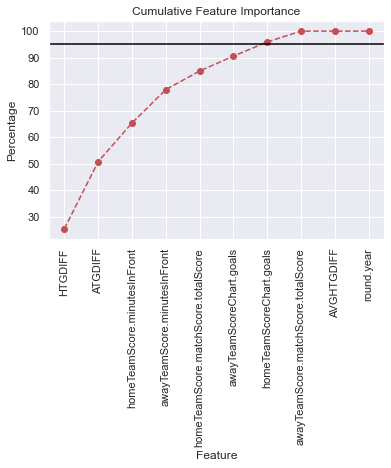

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

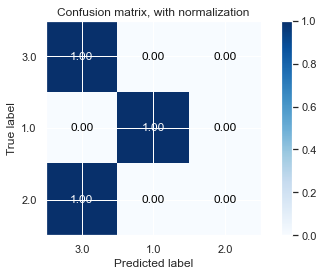

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 90.43%


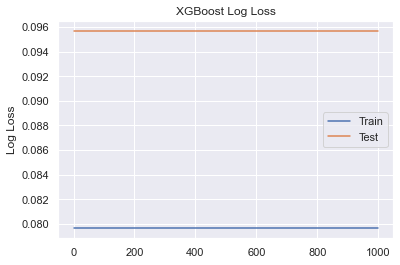

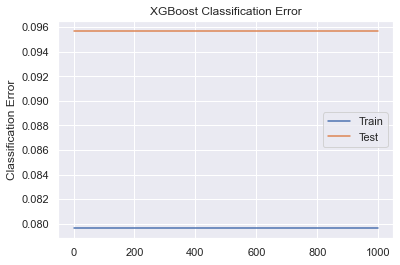

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
54,West Coast Eagles,Richmond,3.0
55,Geelong Cats,Fremantle,3.0
56,Adelaide Crows,GWS Giants,1.0
57,Melbourne,Hawthorn,1.0
58,St Kilda,Port Adelaide,1.0
59,Carlton,North Melbourne,1.0
60,Collingwood,Gold Coast Suns,3.0
61,Western Bulldogs,Essendon,3.0
62,Sydney Swans,Brisbane Lions,1.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]




In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
54,West Coast Eagles,Richmond,3.0,0.152104,0.145741,0.702155
55,Geelong Cats,Fremantle,3.0,0.152104,0.145741,0.702155
56,Adelaide Crows,GWS Giants,1.0,0.655789,0.161471,0.182740
57,Melbourne,Hawthorn,1.0,0.536102,0.217617,0.246281
58,St Kilda,Port Adelaide,1.0,0.655789,0.161471,0.182740
59,Carlton,North Melbourne,1.0,0.655789,0.161471,0.182740
60,Collingwood,Gold Coast Suns,3.0,0.152104,0.145741,0.702155
61,Western Bulldogs,Essendon,3.0,0.152104,0.145741,0.702155
62,Sydney Swans,Brisbane Lions,1.0,0.655789,0.161471,0.182740


In [27]:

xgb_df_next_games['home_prob_win'] = 0.0

for i in range(len(xgb_df_next_games)):
    if xgb_df_next_games['predicted_result'].values[i] == 3.0:
        xgb_df_next_games['home_prob_win'].values[i] = xgb_df_next_games['prob_win'].values[i]
    elif xgb_df_next_games['predicted_result'].values[i] == 2.0:
        xgb_df_next_games['home_prob_win'].values[i] = 0.5
    elif xgb_df_next_games['predicted_result'].values[i] == 1.0:
        xgb_df_next_games['home_prob_win'].values[i] = 1.0 - xgb_df_next_games['prob_loss'].values[i]

In [28]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win,home_prob_win
54,West Coast Eagles,Richmond,3.0,0.152104,0.145741,0.702155,0.702155
55,Geelong Cats,Fremantle,3.0,0.152104,0.145741,0.702155,0.702155
56,Adelaide Crows,GWS Giants,1.0,0.655789,0.161471,0.182740,0.344211
57,Melbourne,Hawthorn,1.0,0.536102,0.217617,0.246281,0.463898
58,St Kilda,Port Adelaide,1.0,0.655789,0.161471,0.182740,0.344211
59,Carlton,North Melbourne,1.0,0.655789,0.161471,0.182740,0.344211
60,Collingwood,Gold Coast Suns,3.0,0.152104,0.145741,0.702155,0.702155
61,Western Bulldogs,Essendon,3.0,0.152104,0.145741,0.702155,0.702155
62,Sydney Swans,Brisbane Lions,1.0,0.655789,0.161471,0.182740,0.344211
